# MNIST Classifier using an Vanilla Neural Network

In [1]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(trainx, trainy), (testx, testy) = mnist.load_data()

print('TRAIN X shape: ', trainx.shape)
print('TEST X shape: ', testx.shape)

TRAIN X shape:  (60000, 28, 28)
TEST X shape:  (10000, 28, 28)


In [3]:
# RESHAPING AND REFORMATTING DATA
DIMS = trainx.shape[1] * trainx.shape[2]
trainx = trainx.reshape(trainx.shape[0], DIMS).astype('float32')
testx = testx.reshape(testx.shape[0], DIMS).astype('float32')

trainy = np_utils.to_categorical(trainy)     # converts classes to one-hot encoding
testy = np_utils.to_categorical(testy)

# NORMALIZING
trainx = trainx / 255.
testx = testx / 255.

In [4]:
# MODELING
model = Sequential()
model.add(Dense(512, input_shape=(DIMS,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# TRAINING
epochs = 20
history = model.fit(trainx, trainy, 
                    batch_size=128,
                    epochs=epochs,
                    validation_data=(testx, testy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 162us/step - loss: 0.2448 - acc: 0.9263 - val_loss: 0.0984 - val_acc: 0.9702
Epoch 2/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.1006 - acc: 0.9688 - val_loss: 0.0768 - val_acc: 0.9754
Epoch 3/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0712 - acc: 0.9780 - val_loss: 0.0637 - val_acc: 0.9789
Epoch 4/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.0558 - acc: 0.9826 - val_loss: 0.0704 - val_acc: 0.9784
Epoch 5/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0433 - acc: 0.9860 - val_loss: 0.0684 - val_acc: 0.9799
Epoch 6/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.0392 - acc: 0.9873 - val_loss: 0.0625 - val_acc: 0.9823
Epoch 7/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0351 - acc: 0.9890 - val_loss: 0.0656 

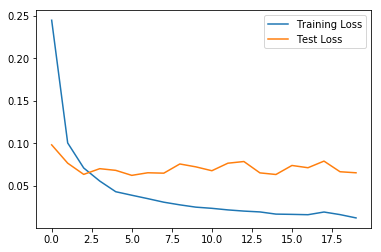

In [6]:
plt.plot(range(epochs), history.history['loss'], label='Training Loss')
plt.plot(range(epochs), history.history['val_loss'], label='Test Loss')
plt.legend(loc='upper right')

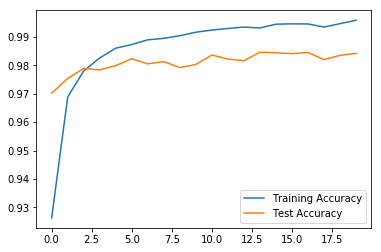

In [7]:
plt.plot(range(epochs), history.history['acc'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_acc'], label='Test Accuracy')
plt.legend(loc='lower right')

### Final Training Loss: 0.0125
### Final Test Loss: 0.0655

### Final Training Accuracy: 99.59%
### Final Test Accuracy: 98.42%